<a href="https://colab.research.google.com/github/BarbaraAngelesOrtiz/Challenge-Alura-Store/blob/main/AluraStoreLatam_es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300.00","6,900.00",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08
1,Mesa de comedor,Muebles,"192,300.00","8,400.00",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56
2,Juego de mesa,Juguetes,"209,600.00","15,900.00",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51
3,Microondas,Electrodomésticos,"757,500.00","41,000.00",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52
4,Silla de oficina,Muebles,"335,200.00","20,200.00",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56


#1. Análisis de facturación



In [ ]:
ingreso1 = tienda['Precio'].sum()
ingreso2 = tienda2['Precio'].sum()
ingreso3 = tienda3['Precio'].sum()
ingreso4 = tienda4['Precio'].sum()

ingresos = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso Total': [ingreso1, ingreso2, ingreso3, ingreso4]
}

ingresos_df = pd.DataFrame(ingresos)

pd.options.display.float_format = '{:,.2f}'.format

print(ingresos_df)


     Tienda    Ingreso Total
0  Tienda 1 1,150,880,400.00
1  Tienda 2 1,116,343,500.00
2  Tienda 3 1,098,019,600.00
3  Tienda 4 1,038,375,700.00


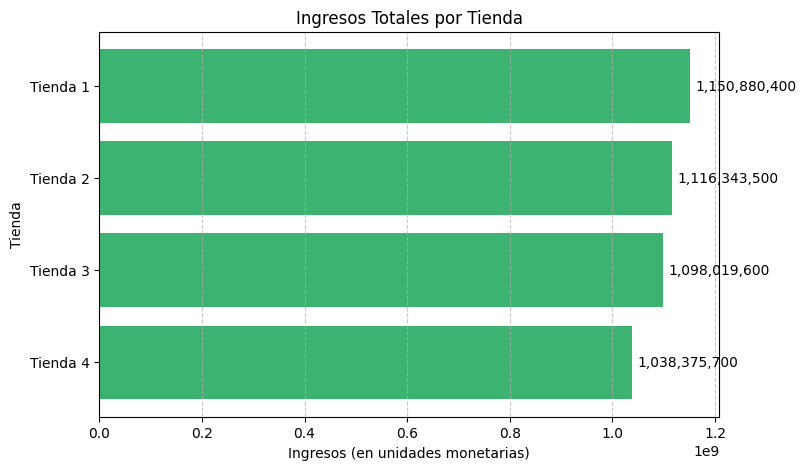

In [ ]:
ingresos = [
    tienda['Precio'].sum(),
    tienda2['Precio'].sum(),
    tienda3['Precio'].sum(),
    tienda4['Precio'].sum()
]

nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.figure(figsize=(8,5))
bars = plt.barh(nombres_tiendas, ingresos, color='mediumseagreen')
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Ingresos (en unidades monetarias)')
plt.ylabel('Tienda')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.text(width + width * 0.01, bar.get_y() + bar.get_height() / 2,
             f'{width:,.0f}', va='center')

plt.savefig('Ingresos_totales_por_tienda.png')
plt.show()
plt.close()


# 2. Ventas por categoría

In [ ]:
def contar_productos_por_categoria(df, nombre_tienda):
    conteo = df['Categoría del Producto'].value_counts().reset_index()
    conteo.columns = ['Categoría', 'Cantidad Vendida']
    conteo['Tienda'] = nombre_tienda
    return conteo

categorias_tienda = contar_productos_por_categoria(tienda, 'Tienda 1')
categorias_tienda2 = contar_productos_por_categoria(tienda2, 'Tienda 2')
categorias_tienda3 = contar_productos_por_categoria(tienda3, 'Tienda 3')
categorias_tienda4 = contar_productos_por_categoria(tienda4, 'Tienda 4')

categorias_totales = pd.concat([categorias_tienda, categorias_tienda2, categorias_tienda3, categorias_tienda4])

print(categorias_totales)

                 Categoría  Cantidad Vendida    Tienda
0                  Muebles               465  Tienda 1
1             Electrónicos               448  Tienda 1
2                 Juguetes               324  Tienda 1
3        Electrodomésticos               312  Tienda 1
4     Deportes y diversión               284  Tienda 1
5   Instrumentos musicales               182  Tienda 1
6                   Libros               173  Tienda 1
7  Artículos para el hogar               171  Tienda 1
0                  Muebles               442  Tienda 2
1             Electrónicos               422  Tienda 2
2                 Juguetes               313  Tienda 2
3        Electrodomésticos               305  Tienda 2
4     Deportes y diversión               275  Tienda 2
5   Instrumentos musicales               224  Tienda 2
6                   Libros               197  Tienda 2
7  Artículos para el hogar               181  Tienda 2
0                  Muebles               499  Tienda 3
1         

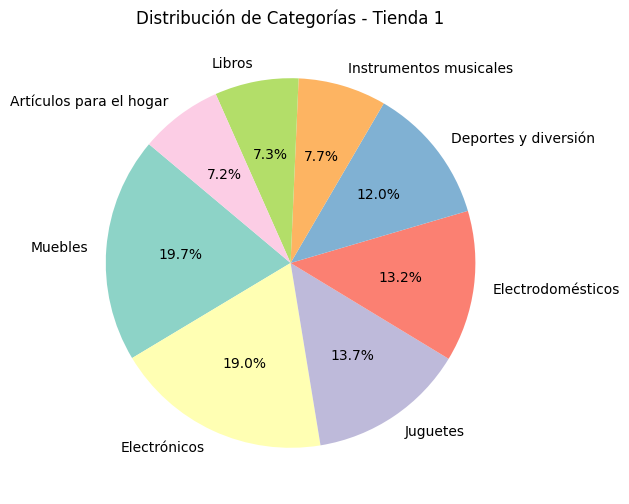


--------------------------------------------------------------------------------



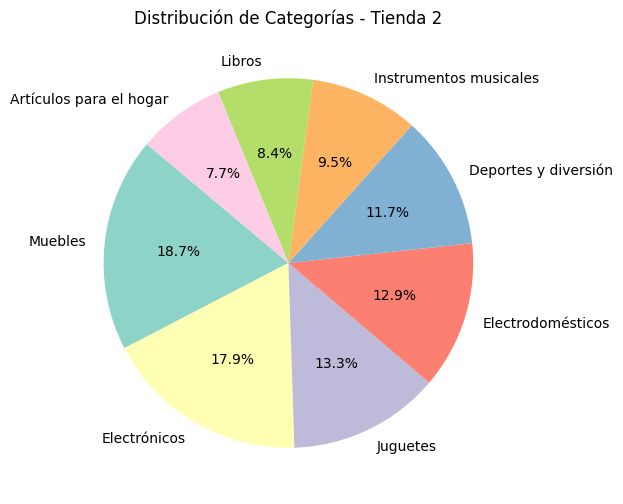


--------------------------------------------------------------------------------



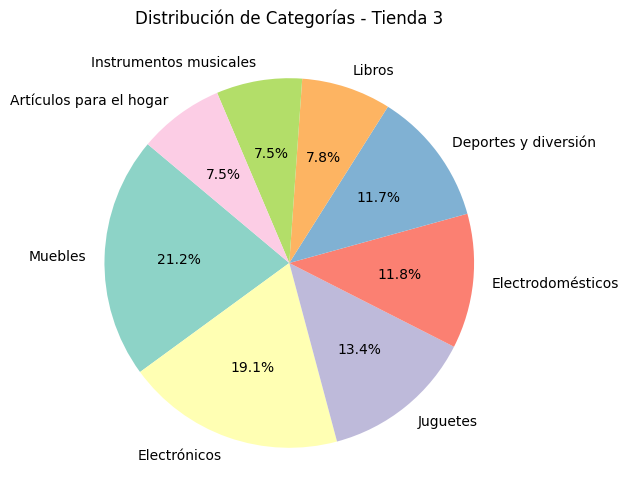


--------------------------------------------------------------------------------



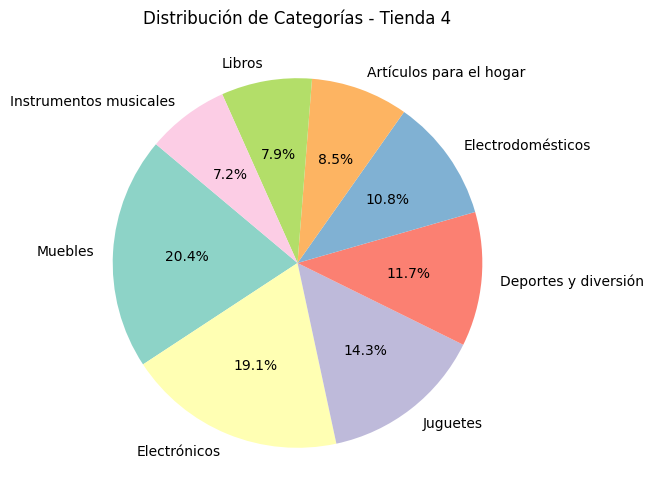


--------------------------------------------------------------------------------



In [ ]:
import matplotlib.pyplot as plt

tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

for i, (df, nombre) in enumerate(zip(tiendas, nombres_tiendas), start=1):
    categorias = df['Categoría del Producto'].value_counts()

    plt.figure(figsize=(6, 6))
    plt.pie(categorias, labels=categorias.index, autopct='%1.1f%%',
            startangle=140, colors=plt.cm.Set3.colors)

    plt.title(f'Distribución de Categorías - {nombre}')

    archivo_individual = f'distribucion_categorias_{nombre.lower().replace(" ", "_")}.png'
    plt.savefig(archivo_individual, bbox_inches='tight')


    plt.show()
    plt.close()
    print("\n" + "-"*80 + "\n")


# 3. Calificación promedio de la tienda


In [ ]:
def promedio_calificacion(df):
    return df['Calificación'].mean()

promedio1 = promedio_calificacion(tienda)
promedio2 = promedio_calificacion(tienda2)
promedio3 = promedio_calificacion(tienda3)
promedio4 = promedio_calificacion(tienda4)

promedios = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Promedio de Calificación': [promedio1, promedio2, promedio3, promedio4]
}

promedios_df = pd.DataFrame(promedios)

print(promedios_df)

     Tienda  Promedio de Calificación
0  Tienda 1                      3.98
1  Tienda 2                      4.04
2  Tienda 3                      4.05
3  Tienda 4                      4.00


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

promedios_calificacion = [
    tienda['Calificación'].mean(),
    tienda2['Calificación'].mean(),
    tienda3['Calificación'].mean(),
    tienda4['Calificación'].mean()
]

nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

import pandas as pd
calificaciones_df = pd.DataFrame({
    'Tienda': nombres_tiendas,
    'Promedio de Calificación': promedios_calificacion
})


<ipython-input-71-c8e76448feac>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


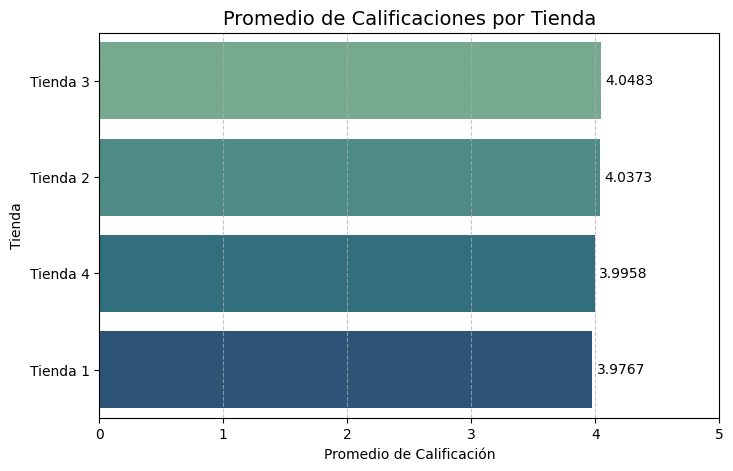

In [ ]:
calificaciones_df = calificaciones_df.sort_values('Promedio de Calificación', ascending=False)

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=calificaciones_df,
    y='Tienda',
    x='Promedio de Calificación',
    palette='crest'
)

for i in ax.containers:
    ax.bar_label(i, fmt='%.4f', label_type='edge', padding=3)

plt.title('Promedio de Calificaciones por Tienda', fontsize=14)
plt.xlim(0, 5)
plt.xlabel('Promedio de Calificación')
plt.ylabel('Tienda')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.savefig('Promedio_de_Calificaciones_por_Tienda.png')
plt.show()
plt.close()


# 4. Productos más y menos vendidos

In [ ]:
def productos_extremos(df, nombre_tienda):
    conteo = df['Producto'].value_counts()

    mas_vendido = conteo.idxmax()
    ventas_mas_vendido = conteo.max()

    menos_vendido = conteo.idxmin()
    ventas_menos_vendido = conteo.min()

    print(f"\n{nombre_tienda}")
    print(f"Producto más vendido: {mas_vendido} ({ventas_mas_vendido} ventas)")
    print(f"Producto menos vendido: {menos_vendido} ({ventas_menos_vendido} ventas)")


productos_extremos(tienda, 'Tienda 1')
productos_extremos(tienda2, 'Tienda 2')
productos_extremos(tienda3, 'Tienda 3')
productos_extremos(tienda4, 'Tienda 4')


Tienda 1
Producto más vendido: Microondas (60 ventas)
Producto menos vendido: Auriculares con micrófono (33 ventas)

Tienda 2
Producto más vendido: Iniciando en programación (65 ventas)
Producto menos vendido: Juego de mesa (32 ventas)

Tienda 3
Producto más vendido: Kit de bancas (57 ventas)
Producto menos vendido: Bloques de construcción (35 ventas)

Tienda 4
Producto más vendido: Cama box (62 ventas)
Producto menos vendido: Guitarra eléctrica (33 ventas)


# 5. Envío promedio por tienda

In [ ]:
def promedio_costo_envio(df):
    return df['Costo de envío'].mean()

promedio_envio1 = promedio_costo_envio(tienda)
promedio_envio2 = promedio_costo_envio(tienda2)
promedio_envio3 = promedio_costo_envio(tienda3)
promedio_envio4 = promedio_costo_envio(tienda4)

costos_envio = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Costo de Envío Promedio': [promedio_envio1, promedio_envio2, promedio_envio3, promedio_envio4]
}

costos_envio_df = pd.DataFrame(costos_envio)

print(costos_envio_df)

     Tienda  Costo de Envío Promedio
0  Tienda 1                26,018.61
1  Tienda 2                25,216.24
2  Tienda 3                24,805.68
3  Tienda 4                23,459.46


#Ganancia

Si asumimos que la única inversión/costo es el envío, puedo calcular como Ganancia:

`Ganancia = Precio - Costo de envío`


*   **Tienda 1: $1,089,502,500.00 unidades monetarias**

*   **Tienda 2: $1,056,858,400.00 unidades monetarias**

*   **Tienda 3: $1,039,503,000.00 unidades monetarias**

*   **Tienda 4: $983,058,300.00 unidades monetarias**

Siendo la Tienda 1 la que mas Ganancia daría al Sr Juan.


In [ ]:
ganancia1 = (tienda['Precio'] - tienda['Costo de envío']).sum()
ganancia2 = (tienda2['Precio'] - tienda2['Costo de envío']).sum()
ganancia3 = (tienda3['Precio'] - tienda3['Costo de envío']).sum()
ganancia4 = (tienda4['Precio'] - tienda4['Costo de envío']).sum()

ganancias = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ganancia Total': [ganancia1, ganancia2, ganancia3, ganancia4]
}

ganancias_df = pd.DataFrame(ganancias)
print(ganancias_df)




     Tienda   Ganancia Total
0  Tienda 1 1,089,502,500.00
1  Tienda 2 1,056,858,400.00
2  Tienda 3 1,039,503,000.00
3  Tienda 4   983,058,300.00


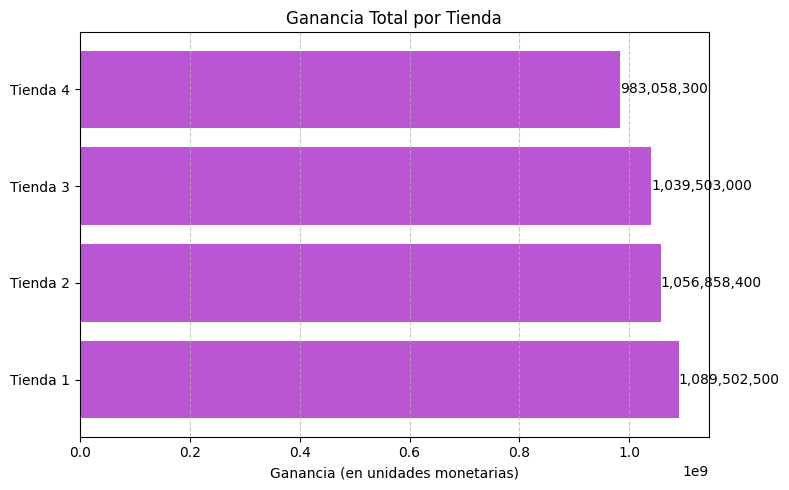

In [ ]:
import matplotlib.pyplot as plt

ganancia1 = (tienda['Precio'] - tienda['Costo de envío']).sum()
ganancia2 = (tienda2['Precio'] - tienda2['Costo de envío']).sum()
ganancia3 = (tienda3['Precio'] - tienda3['Costo de envío']).sum()
ganancia4 = (tienda4['Precio'] - tienda4['Costo de envío']).sum()

ganancias = [ganancia1, ganancia2, ganancia3, ganancia4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.figure(figsize=(8,5))
bars = plt.barh(nombres_tiendas, ganancias, color='mediumorchid')
plt.title('Ganancia Total por Tienda')
plt.xlabel('Ganancia (en unidades monetarias)')
plt.grid(axis='x', linestyle='--', alpha=0.7)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10000, bar.get_y() + bar.get_height()/2,
             f'{int(width):,}', va='center')

plt.tight_layout()
plt.show()


#Informe Final de Análisis de Tiendas
##Introducción
El objetivo de este análisis fue determinar en qué tienda debería vender sus productos el Sr. Juan. Para ello, analizamos los ingresos totales de cada tienda, las categorías de productos más y menos vendidas, las calificaciones promedio de los clientes, los productos destacados en ventas y el costo promedio de envío. Estos factores son claves para entender cuál tienda ofrece mayores oportunidades de éxito comercial.




#Ingresos Totales
Se calcularon los ingresos sumando los precios de venta de todos los productos en cada tienda.
El análisis mostró que:

Tienda 1 tuvo ingresos de 1,150,880,400.00 unidades monetarias.

Tienda 2 tuvo ingresos de 1,116,343,500.00 unidades monetarias.

Tienda 3 tuvo ingresos de 1,098,019,600.00 unidades monetarias.

Tienda 4 tuvo ingresos de 1,038,375,700.00 unidades monetarias.

 **La Tienda 1 generó los mayores ingresos, indicando un volumen de ventas más fuerte.**

Gráfico de barras mostrado: Ingresos Totales por Tienda, a continuación:

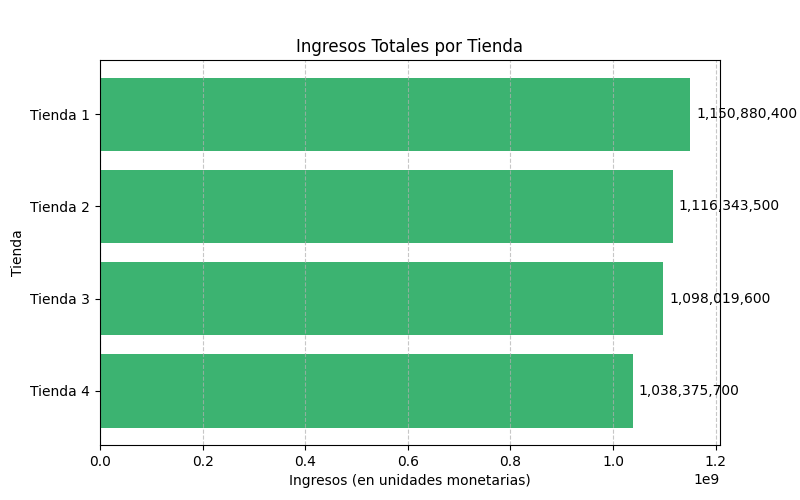

In [ ]:
from IPython.display import Image, display

display(Image('Ingresos_totales_por_tienda.png'))



#Distribución de Categorías
Se analizó la distribución de ventas por categorías de productos en todas las Tiendas.

**El gráfico de pastel mostró que las categorías "Muebles","Electrónicos",       "Juguetes","Electrodomésticos" y "Deportes y diversión" fueron las más populares en las Tiendas 1,2 y 3, mientras que la Tienda 4 no coincide con esas categorias como las más populares.**

**La categorías "Artículos para el hogar"tuvo menor participación en las Tiendas 1,2 y 3, pero no en la Tienda 4.**

Esto es relevante para alinear el tipo de producto que el Sr. Juan podría vender.

A continuación se puede ver los gráficos de Distribución de Categorías por Tienda, su método de pago y categoría vs precio:

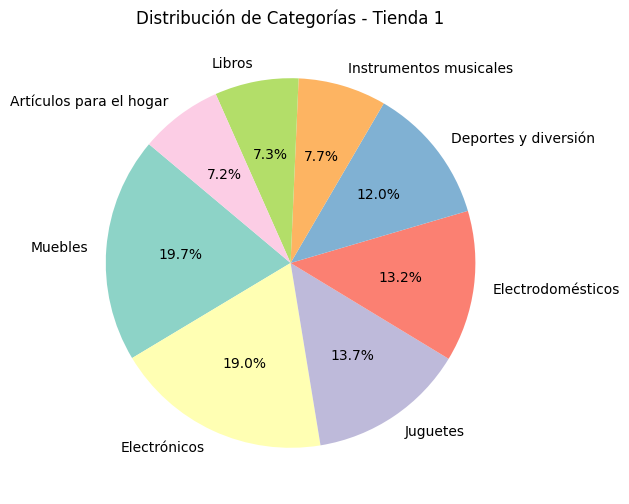

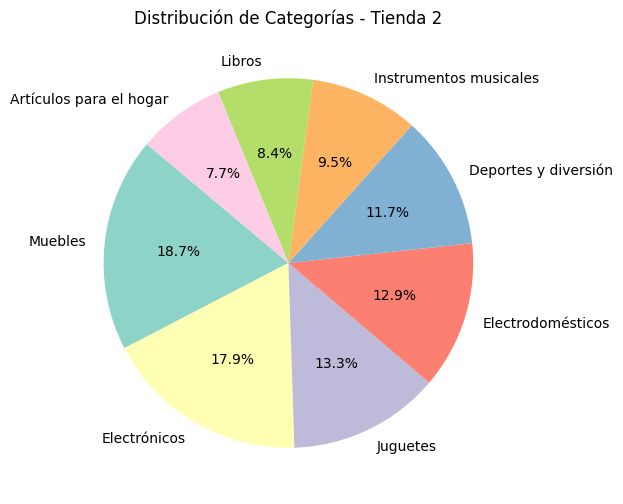

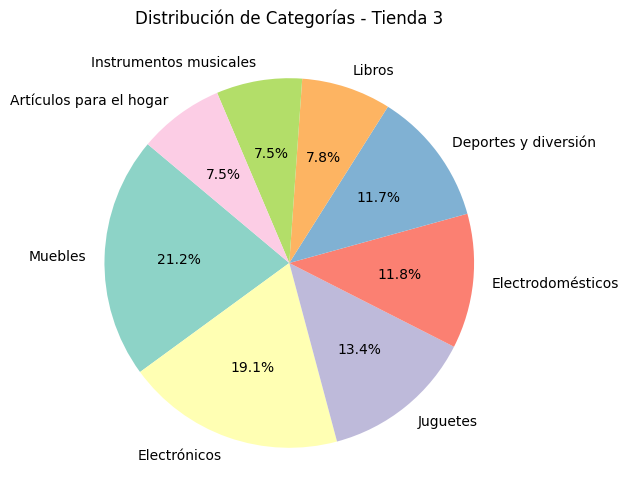

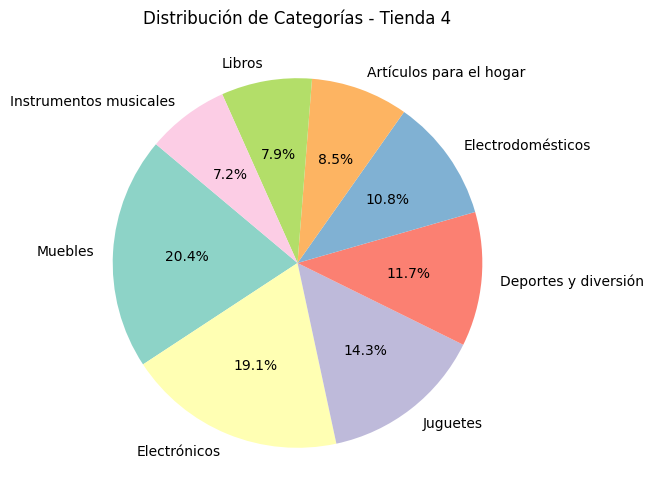

In [ ]:
display(Image('distribucion_categorias_tienda_1.png'))
display(HTML("<br>"))
display(Image('distribucion_categorias_tienda_2.png'))
display(HTML("<br>"))
display(Image('distribucion_categorias_tienda_3.png'))
display(HTML("<br>"))
display(Image('distribucion_categorias_tienda_4.png'))


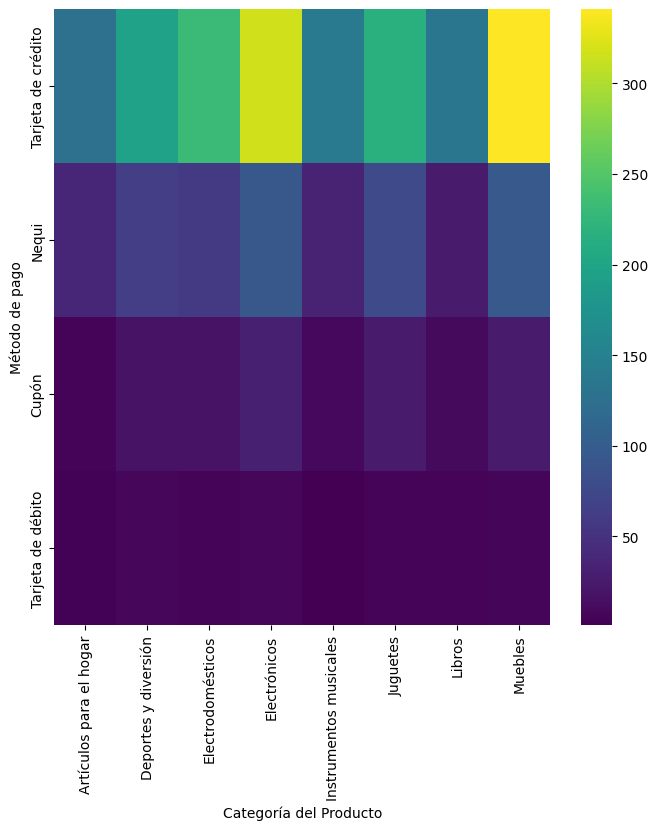

In [ ]:
# @title Categoría del Producto vs Método de pago

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Método de pago'].value_counts()
    for x_label, grp in tienda.groupby('Categoría del Producto')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Categoría del Producto')
_ = plt.ylabel('Método de pago')

<ipython-input-98-f01e7b2406a2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(tienda, x='Precio', y='Categoría del Producto', inner='box', palette='Dark2')


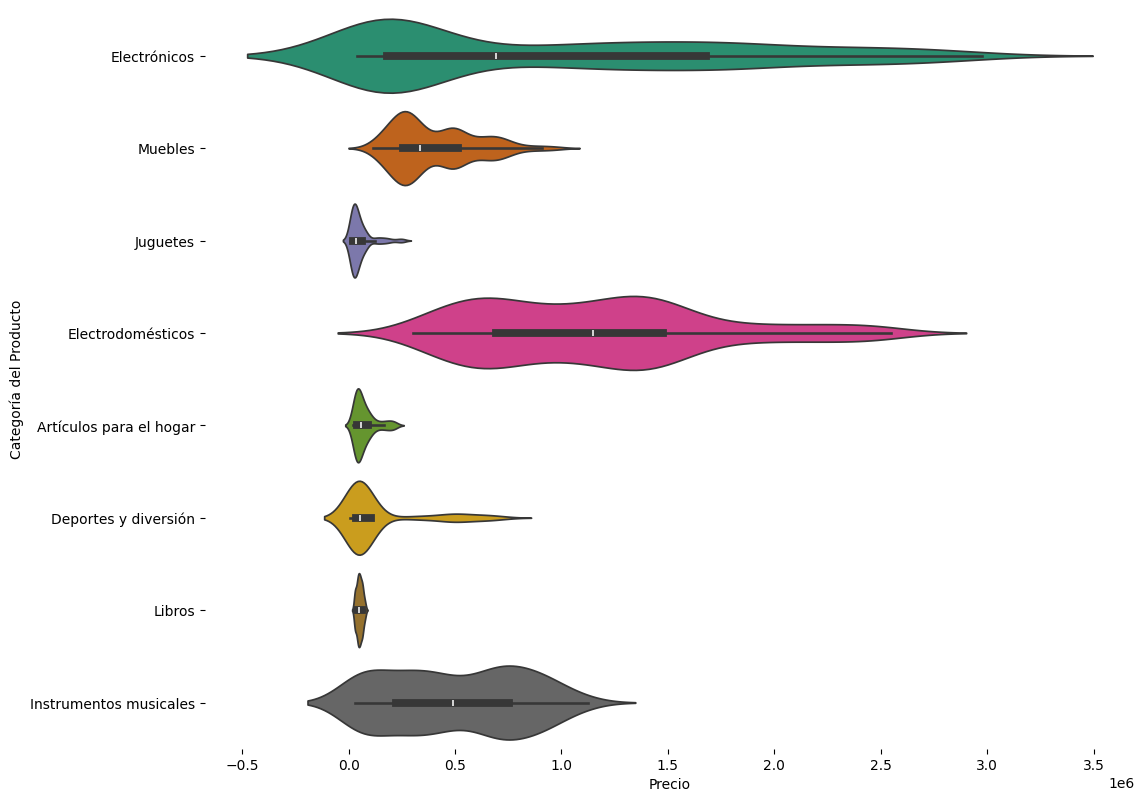

In [ ]:
# @title Categoría del Producto vs Precio

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(tienda['Categoría del Producto'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(tienda, x='Precio', y='Categoría del Producto', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

#Calificaciones Promedio
Analizando la satisfacción del cliente:

Tienda 1: promedio de 3,9767 estrellas.

Tienda 2: promedio de 4,0373 estrellas.

Tienda 3: promedio de 4,0483 estrellas.

Tienda 4: promedio de 3,9958 estrellas.

**La tienda con la mejor satisfacción fue Tienda 3, lo cual sugiere clientes más contentos y posiblemente mayor fidelidad.**

Gráfico de barras mostrado: Promedio de Calificaciones por Tienda, a continuación:

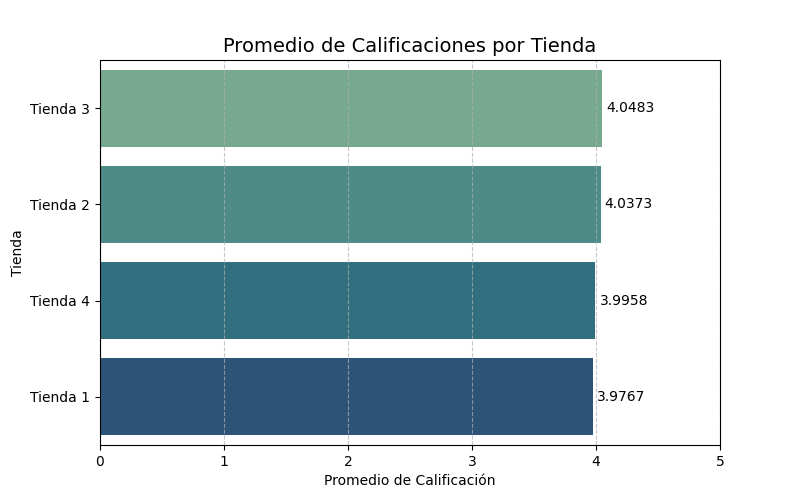

In [ ]:
from IPython.display import Image, display

display(Image('Promedio_de_Calificaciones_por_Tienda.png'))

#Productos más y menos vendidos
Se identificaron los productos más populares en cada tienda.

Tienda 1
Producto más vendido: Microondas (60 ventas)
Producto menos vendido: Auriculares con micrófono (33 ventas)

Tienda 2
Producto más vendido: Iniciando en programación (65 ventas)
Producto menos vendido: Juego de mesa (32 ventas)

Tienda 3
Producto más vendido: Kit de bancas (57 ventas)
Producto menos vendido: Bloques de construcción (35 ventas)

Tienda 4
Producto más vendido: Cama box (62 ventas)
Producto menos vendido: Guitarra eléctrica (33 ventas)

Esto permite entender qué productos tienen más demanda y ajustar la oferta si es necesario.





Tienda 1
Producto más vendido: Microondas (60 ventas)
Producto menos vendido: Auriculares con micrófono (33 ventas)


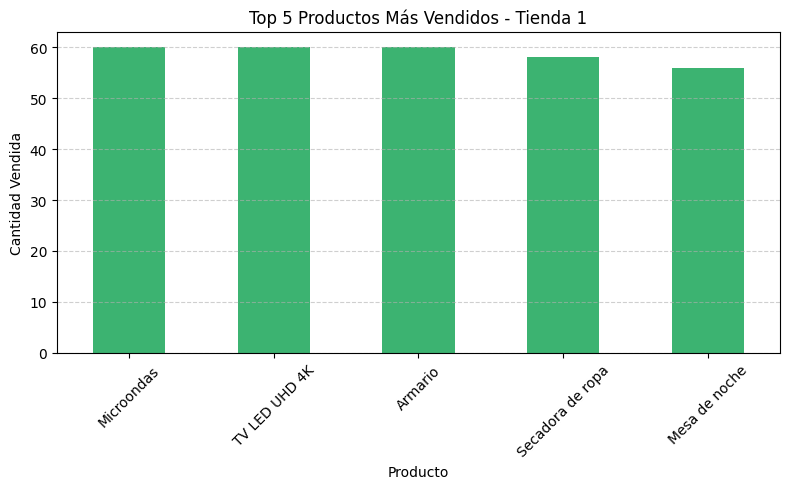


Tienda 2
Producto más vendido: Iniciando en programación (65 ventas)
Producto menos vendido: Juego de mesa (32 ventas)


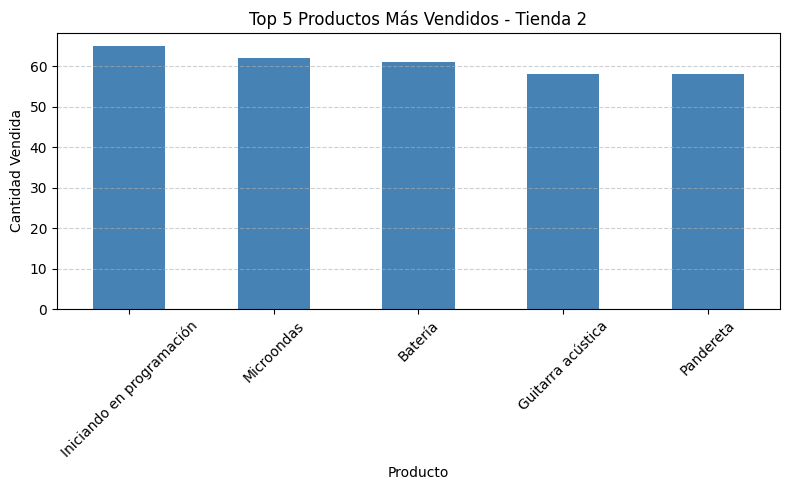


Tienda 3
Producto más vendido: Kit de bancas (57 ventas)
Producto menos vendido: Bloques de construcción (35 ventas)


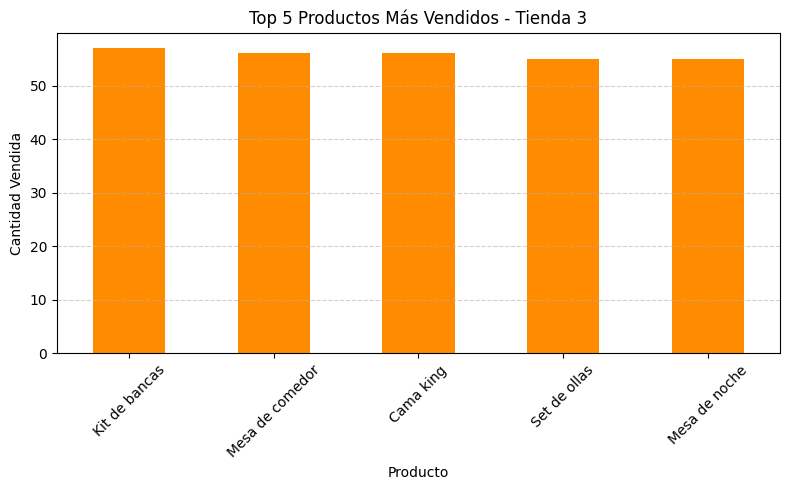


Tienda 4
Producto más vendido: Cama box (62 ventas)
Producto menos vendido: Guitarra eléctrica (33 ventas)


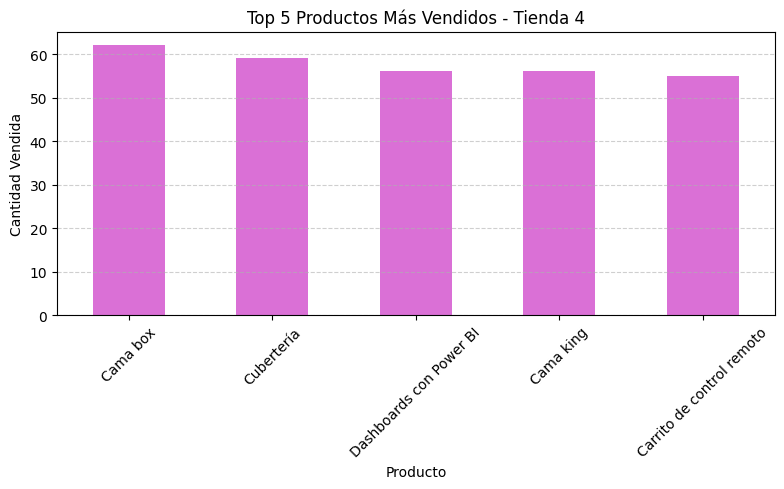

In [ ]:
import matplotlib.pyplot as plt

colores_tienda = {
    'Tienda 1': 'mediumseagreen',
    'Tienda 2': 'steelblue',
    'Tienda 3': 'darkorange',
    'Tienda 4': 'orchid'
}

def productos_extremos(df, nombre_tienda):
    conteo = df['Producto'].value_counts()

    mas_vendido = conteo.idxmax()
    ventas_mas_vendido = conteo.max()

    menos_vendido = conteo.idxmin()
    ventas_menos_vendido = conteo.min()

    print(f"\n{nombre_tienda}")
    print(f"Producto más vendido: {mas_vendido} ({ventas_mas_vendido} ventas)")
    print(f"Producto menos vendido: {menos_vendido} ({ventas_menos_vendido} ventas)")

    top5 = conteo.head(5)

    plt.figure(figsize=(8,5))
    top5.plot(kind='bar', color=colores_tienda[nombre_tienda])
    plt.title(f'Top 5 Productos Más Vendidos - {nombre_tienda}')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()

    nombre_archivo = f'top5_productos_{nombre_tienda.lower().replace(" ", "_")}.png'
    plt.savefig(nombre_archivo, dpi=300)
    plt.show()

productos_extremos(tienda, 'Tienda 1')
productos_extremos(tienda2, 'Tienda 2')
productos_extremos(tienda3, 'Tienda 3')
productos_extremos(tienda4, 'Tienda 4')


#Costos de Envío Promedio
El costo de envío promedio en cada tienda fue:

*   **Tienda 1: $26019 unidades monetarias**

*   **Tienda 2: $25216 unidades monetarias**

*   **Tienda 3: $24806 unidades monetarias**

*   **Tienda 4: $23459 unidades monetarias**

Tiendas con costos de envío más bajos pueden representar una ventaja competitiva para los clientes.



<ipython-input-101-71281ab96120>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


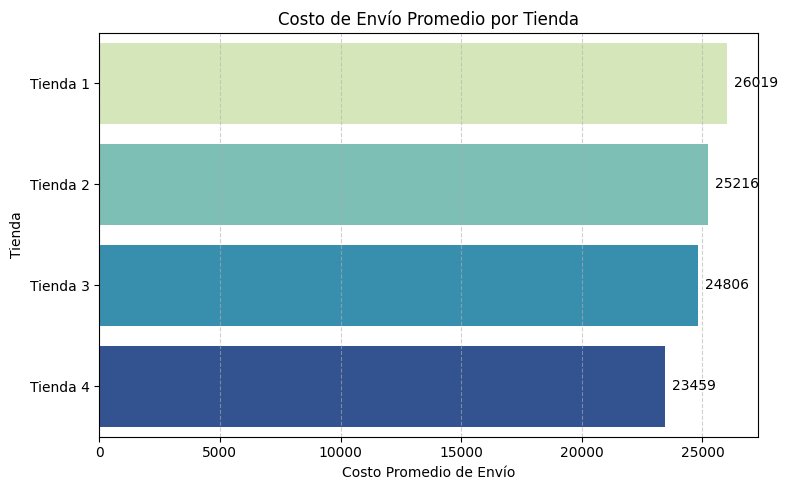

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costos_envio = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Costo de Envío Promedio': [promedio_envio1, promedio_envio2, promedio_envio3, promedio_envio4]
}
costos_envio_df = pd.DataFrame(costos_envio)

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=costos_envio_df,
    y='Tienda',
    x='Costo de Envío Promedio',
    palette='YlGnBu'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=5)

plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Costo Promedio de Envío')
plt.ylabel('Tienda')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig('costo_envio_promedio_por_tienda.png')
plt.show()



#Análisis del desempeño geográfico

El primer gráfico usa:

1.   lon y lat como ubicación.
2.   El tamaño de los puntos para representar el precio del producto.
3.   El color para reflejar la calificación del cliente.



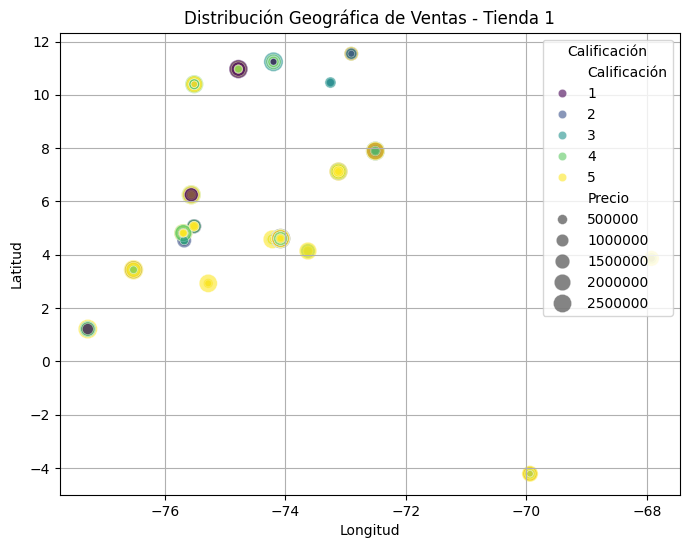

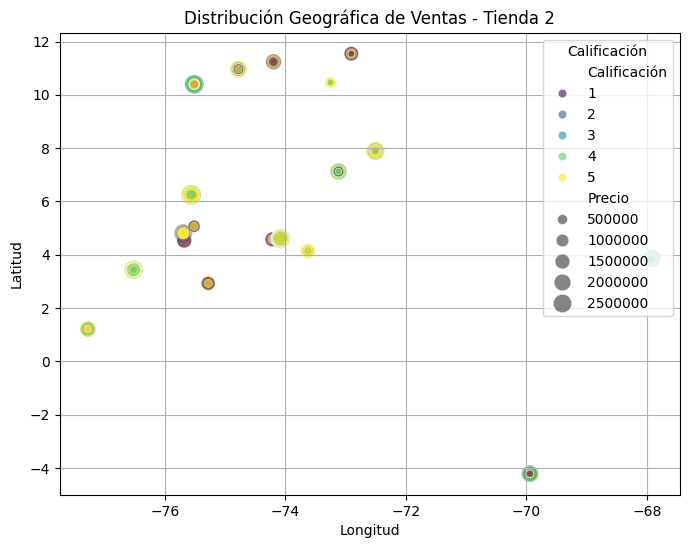

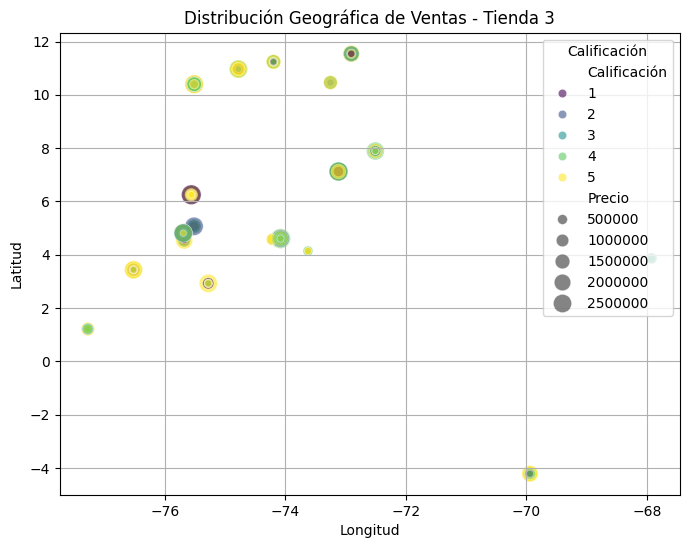

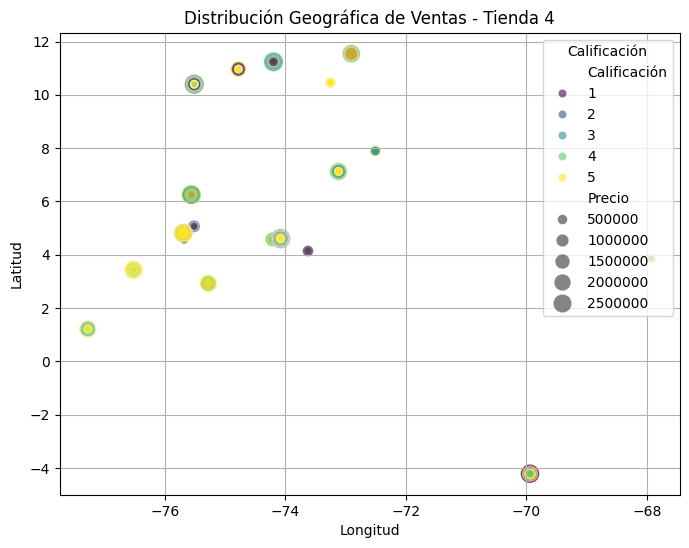

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

for df, nombre in zip(tiendas, nombres_tiendas):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='lon', y='lat', size='Precio', hue='Calificación', data=df, palette='viridis', sizes=(20, 200), alpha=0.6)
    plt.title(f'Distribución Geográfica de Ventas - {nombre}')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.legend(title='Calificación')
    plt.grid(True)
    display(HTML("<br>"))
    plt.show()


##HeatMap de Ventas
Este mapa muestra todas las ventas de las 4 tiendas, calcula el centro del mapa basado en el promedio de latitudes y longitudes, y através del HeatMap representa visualmente las zonas con más puntos de venta.Los puntos más “calientes” (más ventas) se verán con más intensidad.

In [105]:
import folium
from folium.plugins import HeatMap
import pandas as pd

df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

mapa_calor = folium.Map(location=[df_total['lat'].mean(), df_total['lon'].mean()], zoom_start=4)

heat_data = df_total[['lat', 'lon']].values.tolist()
HeatMap(heat_data, radius=12).add_to(mapa_calor)

mapa_calor


#Conclusión
Basándonos en el análisis realizado, se recomienda que el Sr. Juan venda en la Tienda 4. La tienda 4:

* Tiene el menor ingreso total, siendo la Tienda 1 la que indica el mayor ingreso
total y tener un mercado más activo.

* No presenta altas calificaciones de satisfacción por parte de los clientes, es la anteúltima en la lista, siendo la Tienda 3 la que tiene altas calificaciones de satisfacción por parte de los clientes.

* No cuenta con categorías de productos más vendidas alineadas al perfil de productos que el Sr. Juan puede ofrecer, donde las Tiendas 1,2 y 3 tienen las primeras categorias mas vendidas.

* Tiene los costos de envío mas bajos, pero su ganancia es la menor. A diferencia de la Tienda 1 que mejora la competitividad con una mejor relacion Costos de envío/ingresos totales.

* El mapa muestra visualmente donde se encuentran las mayores ventas según la Tienda y su latitud y longitud, predominando la Tienda 1 por tener mejor relacion costo de envío/Ventas.

**Por lo tanto, la Tienda 4 representa la peor oportunidad para maximizar las ventas y la satisfacción del cliente, no garantiza un negocio rentable y sostenible.Y por ende Sr. Juan debería vender la Tienda 4.**